In [23]:
import xarray as xr
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(theme='grade3')

In [24]:
# User-Supplied
file = '/glade/p/work/manab/ff/islandpark/output/001_001_runs_def.nc'   # Fuse output file
out = xr.open_dataset(file)
out

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 17167)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-01 ...
  * latitude   (latitude) float32 44.5118
  * longitude  (longitude) float32 -111.435
Data variables:
    ppt        (time, latitude, longitude) float64 ...
    pet        (time, latitude, longitude) float64 ...
    obsq       (time, latitude, longitude) float64 ...
    watr_1     (time, latitude, longitude) float64 ...
    watr_2     (time, latitude, longitude) float64 ...
    evap_1     (time, latitude, longitude) float64 ...
    evap_2     (time, latitude, longitude) float64 ...
    q_instnt   (time, latitude, longitude) float64 ...
    q_routed   (time, latitude, longitude) float64 ...

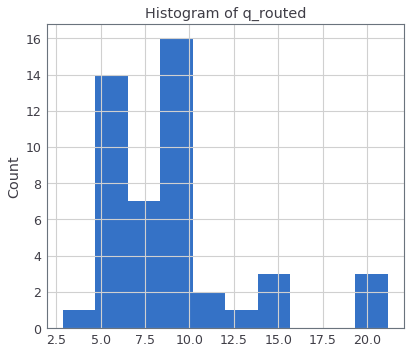

In [32]:
out['q_routed'].groupby('time.year').max().plot.hist()
plt.show()